In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from math import ceil
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from pandas.plotting import scatter_matrix
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import metrics


In [57]:
hitters = pd.read_csv('data/batters.csv')

In [4]:
hitters.head(10)

,.id,year,lvl,g,team_name,payroll,mlb_rk,tm_rk,centile,adj_slry,...,babip,iso,bb_percent,so_percent,ab_per_hr,xbh_percent,fpct,rfg,rfi,cs
0,ID=133910,1991,AA,102,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,97.814208,175.490196,17900.0,0.0
1,ID=2999,1999,NaN,84,NaN,NaN,NaN,NaN,NaN,NaN,...,0.288194,-25.26506,4.761905,12.324930,110.666667,22.352941,NaN,NaN,NaN,NaN
2,ID=78822,1989,A,33,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,96.153846,75.757576,2500.0,0.0
3,ID=15619,1963,MLB,117,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,94.909091,446.153846,52200.0,0.0
4,ID=7592,2010,NaN,119,NaN,NaN,NaN,NaN,NaN,NaN,...,0.319481,-29.39261,16.122841,8.445298,61.857143,22.480620,NaN,NaN,NaN,NaN
5,ID=137550,1992,Rk,20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,10.000000,200.0,0.0
6,ID=80713,1996,Rk,30,NaN,NaN,NaN,NaN,NaN,NaN,...,0.222222,-14.80000,7.920792,26.732673,80.000000,25.000000,98.367347,803.333333,24100.0,0.0
7,ID=7049,2005,AA,137,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98.104265,604.379562,82800.0,0.0
8,ID=4306,1998,Rk,31,Cincinnati Reds,-,NaN,NaN,NaN,2.932265e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,88.888889,129.032258,4000.0,0.0
9,ID=487,2002,MLB,10,Cincinnati Reds,Team Payroll,455.0,16.0,50.0,8.857691e+05,...,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN


In [5]:
hitters.shape[0]

232268

In [6]:
hitters.describe()

,year,g,mlb_rk,tm_rk,centile,adj_slry,adj_lg_min,adj_career_2date,adj_lifetime_earnings,adj_remaining_earnings,...,babip,iso,bb_percent,so_percent,ab_per_hr,xbh_percent,fpct,rfg,rfi,cs
count,232268.000000,232268.000000,32065.000000,32065.000000,20009.000000,3.342100e+04,32065.000000,3.342100e+04,3.342100e+04,3.342100e+04,...,112644.000000,115017.000000,115415.000000,115415.000000,115415.000000,1.054280e+05,138957.000000,138957.000000,138957.000000,138957.000000
mean,1989.646964,57.670945,507.392079,23.217121,57.152032,1.982973e+06,336885.961820,9.854730e+06,2.555718e+07,1.570245e+07,...,0.280486,-22.730344,8.112795,19.775342,59.455380,inf,88.190477,246.424234,13865.615454,0.501947
std,27.512740,42.331564,251.992743,13.352352,25.225373,3.625035e+06,142052.723683,2.326229e+07,4.232166e+07,3.169164e+07,...,0.121559,10.558752,6.976914,16.073723,67.660625,NaN,15.429522,244.817347,22014.428729,3.397886
min,1871.000000,1.000000,1.000000,1.000000,8.000000,6.079609e+02,123581.379395,6.079609e+02,8.268501e+04,0.000000e+00,...,-5.833333,-398.200000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1983.000000,23.000000,295.000000,12.000000,36.000000,3.200625e+05,187603.429918,6.806365e+05,2.240277e+06,5.124589e+05,...,0.247934,-27.860892,4.406780,11.111111,20.333333,1.774194e+01,85.714286,59.523810,400.000000,0.000000
50%,1997.000000,46.000000,572.000000,23.000000,57.000000,5.177066e+05,376544.123805,1.875658e+06,7.438278e+06,2.699148e+06,...,0.291939,-24.500000,7.788945,17.021277,38.500000,2.643678e+01,93.333333,162.962963,2500.000000,0.000000
75%,2008.000000,90.000000,753.000000,34.000000,79.000000,1.707734e+06,451142.361919,6.909031e+06,2.948771e+07,1.573549e+07,...,0.330279,-19.600000,11.039650,24.242424,73.000000,3.444444e+01,96.774194,367.741935,20200.000000,0.000000
max,2018.000000,624.000000,1358.000000,64.000000,100.000000,3.770422e+07,545000.000000,4.504805e+08,4.709065e+08,4.684782e+08,...,1.166667,1.166667,100.000000,100.000000,653.000000,inf,99.911348,8020.000000,603200.000000,89.000000


In [7]:
hitters.columns


Index(['.id', 'year', 'lvl', 'g', 'team_name', 'payroll', 'mlb_rk', 'tm_rk',
       'centile', 'adj_slry', 'adj_lg_min', 'adj_career_2date',
       'adj_lifetime_earnings', 'adj_remaining_earnings', 'scraped_under',
       'draft_year', 'position_when_drafted', 'player_listed_under',
       'proper_name', 'weight', 'bats', 'throws', 'place', 'high_school',
       'signing_bonus', 'awards', 'signing_scouts', 'college', 'relationships',
       'draft_team', 'draft_round', 'draft_posn', 'bdate',
       'pitcher_when_drafted', 'shortst_when_drafted', 'outfldr_when_drafted',
       'baseman_1_when_drafted', 'baseman_2_when_drafted',
       'baseman_3_when_drafted', 'height_inches', 'hschool_state', 'state',
       'draft_age', 'infl_adj_bonus', 'years_since_draft', 'age', 'sb', 'obp',
       'slg', 'ops', 'babip', 'iso', 'bb_percent', 'so_percent', 'ab_per_hr',
       'xbh_percent', 'fpct', 'rfg', 'rfi', 'cs'],
      dtype='object')

In [8]:
hitters.dtypes


.id                        object
year                        int64
lvl                        object
g                           int64
team_name                  object
payroll                    object
mlb_rk                    float64
tm_rk                     float64
centile                   float64
adj_slry                  float64
adj_lg_min                float64
adj_career_2date          float64
adj_lifetime_earnings     float64
adj_remaining_earnings    float64
scraped_under              object
draft_year                float64
position_when_drafted      object
player_listed_under        object
proper_name                object
weight                    float64
bats                       object
throws                     object
place                      object
high_school                object
signing_bonus             float64
awards                    float64
signing_scouts             object
college                    object
relationships              object
draft_team    

In [9]:
hitters.head()

,.id,year,lvl,g,team_name,payroll,mlb_rk,tm_rk,centile,adj_slry,...,babip,iso,bb_percent,so_percent,ab_per_hr,xbh_percent,fpct,rfg,rfi,cs
0,ID=133910,1991,AA,102,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,97.814208,175.490196,17900.0,0.0
1,ID=2999,1999,NaN,84,NaN,NaN,NaN,NaN,NaN,NaN,...,0.288194,-25.26506,4.761905,12.324930,110.666667,22.352941,NaN,NaN,NaN,NaN
2,ID=78822,1989,A,33,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,96.153846,75.757576,2500.0,0.0
3,ID=15619,1963,MLB,117,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,94.909091,446.153846,52200.0,0.0
4,ID=7592,2010,NaN,119,NaN,NaN,NaN,NaN,NaN,NaN,...,0.319481,-29.39261,16.122841,8.445298,61.857143,22.480620,NaN,NaN,NaN,NaN


In [17]:
hitters1990 = hitters[hitters.year == 1990]

In [18]:
hitters1990.shape     

(4340, 60)

In [19]:
hitters1991 = hitters[hitters.year == 1991]

In [20]:
hitters1991.shape


(4294, 60)

In [31]:
hitters['adj_slry'].isnull().count()

232268

In [30]:
hitters.shape

(232268, 60)

In [33]:
hitters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232268 entries, 0 to 232267
Data columns (total 60 columns):
.id                       232268 non-null object
year                      232268 non-null int64
lvl                       219803 non-null object
g                         232268 non-null int64
team_name                 33421 non-null object
payroll                   33421 non-null object
mlb_rk                    32065 non-null float64
tm_rk                     32065 non-null float64
centile                   20009 non-null float64
adj_slry                  33421 non-null float64
adj_lg_min                32065 non-null float64
adj_career_2date          33421 non-null float64
adj_lifetime_earnings     33421 non-null float64
adj_remaining_earnings    33421 non-null float64
scraped_under             33421 non-null object
draft_year                149275 non-null float64
position_when_drafted     153034 non-null object
player_listed_under       232189 non-null object
proper_name

In [58]:
hitters1990.head()

,.id,year,lvl,g,team_name,payroll,mlb_rk,tm_rk,centile,adj_slry,...,babip,iso,bb_percent,so_percent,ab_per_hr,xbh_percent,fpct,rfg,rfi,cs
16,ID=136924,1990,Rk,27,NaN,NaN,NaN,NaN,NaN,NaN,...,0.273810,-23.947368,2.000000,11.000000,95.000000,8.695652,85.593220,374.074074,10100.0,0.0
30,ID=96484,1990,A+,136,NaN,NaN,NaN,NaN,NaN,NaN,...,0.285068,-25.831193,4.931973,15.816327,30.277778,29.370629,NaN,NaN,NaN,NaN
108,ID=136068,1990,Rk,13,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,97.142857,261.538462,3400.0,0.0
120,ID=98909,1990,Rk,35,NaN,NaN,NaN,NaN,NaN,NaN,...,0.230769,-18.508929,6.400000,17.600000,112.000000,23.809524,NaN,NaN,NaN,NaN
173,ID=89408,1990,AAA,92,NaN,NaN,NaN,NaN,NaN,NaN,...,0.271277,-22.391111,14.339623,14.339623,225.000000,19.607843,NaN,NaN,NaN,NaN


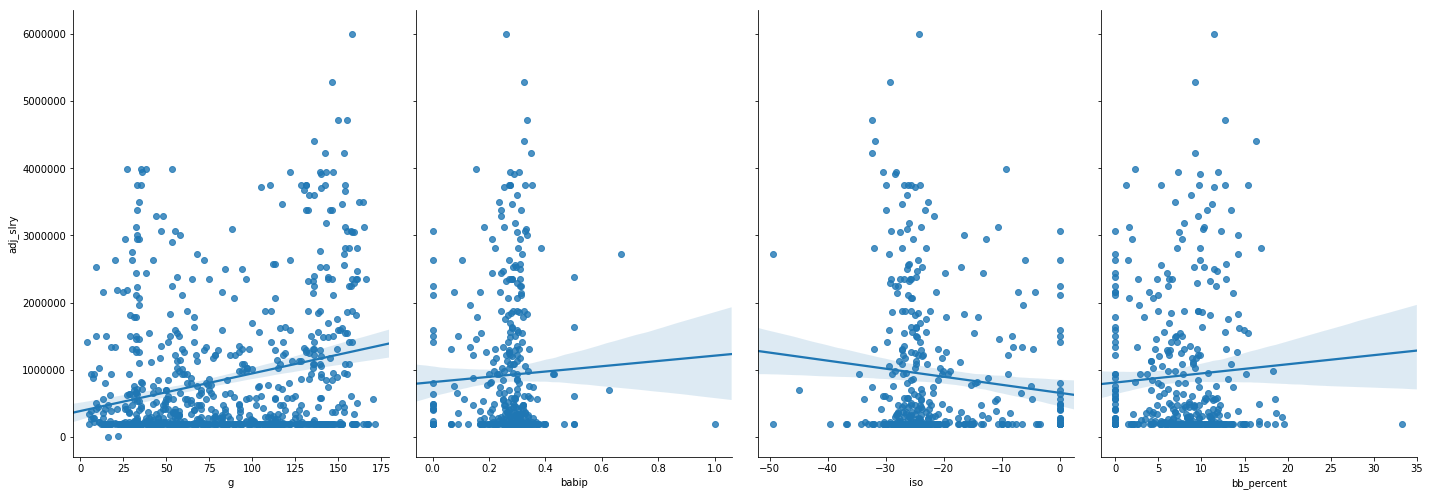

In [59]:
sns.pairplot(hitters1990,x_vars=['g','babip','iso','bb_percent'],y_vars='adj_slry',size=7,aspect=0.7,kind='reg')

In [60]:
features = ['g','iso','babip','ops','ab_per_hr']

In [ ]:
batters1990 = hitters1990[]

In [61]:
X = hitters1990[features]

In [64]:
y = hitters1990['adj_slry']

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [66]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)
print(linreg.intercept_)
print(linreg.coef_)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [68]:
hitters.head()

,.id,year,lvl,g,team_name,payroll,mlb_rk,tm_rk,centile,adj_slry,...,babip,iso,bb_percent,so_percent,ab_per_hr,xbh_percent,fpct,rfg,rfi,cs
0,ID=133910,1991,AA,102,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,97.814208,175.490196,17900.0,0.0
1,ID=2999,1999,NaN,84,NaN,NaN,NaN,NaN,NaN,NaN,...,0.288194,-25.26506,4.761905,12.324930,110.666667,22.352941,NaN,NaN,NaN,NaN
2,ID=78822,1989,A,33,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,96.153846,75.757576,2500.0,0.0
3,ID=15619,1963,MLB,117,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,94.909091,446.153846,52200.0,0.0
4,ID=7592,2010,NaN,119,NaN,NaN,NaN,NaN,NaN,NaN,...,0.319481,-29.39261,16.122841,8.445298,61.857143,22.480620,NaN,NaN,NaN,NaN


,.id,year,lvl,g,team_name,payroll,mlb_rk,tm_rk,centile,adj_slry,...,babip,iso,bb_percent,so_percent,ab_per_hr,xbh_percent,fpct,rfg,rfi,cs
0,ID=133910,1991,AA,102,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,97.814208,175.490196,17900.000000,0.0
1,ID=2999,1999,NaN,84,NaN,NaN,NaN,NaN,NaN,NaN,...,0.288194,-25.265060,4.761905,12.324930,110.666667,22.352941,NaN,NaN,NaN,NaN
2,ID=78822,1989,A,33,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,96.153846,75.757576,2500.000000,0.0
3,ID=15619,1963,MLB,117,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,94.909091,446.153846,52200.000000,0.0
4,ID=7592,2010,NaN,119,NaN,NaN,NaN,NaN,NaN,NaN,...,0.319481,-29.392610,16.122841,8.445298,61.857143,22.480620,NaN,NaN,NaN,NaN
5,ID=137550,1992,Rk,20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,10.000000,200.000000,0.0
6,ID=80713,1996,Rk,30,NaN,NaN,NaN,NaN,NaN,NaN,...,0.222222,-14.800000,7.920792,26.732673,80.000000,25.000000,98.367347,803.333333,24100.000000,0.0
7,ID=7049,2005,AA,137,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98.104265,604.379562,82800.000000,0.0
8,ID=4306,1998,Rk,31,Cincinnati Reds,-,NaN,NaN,NaN,2.932265e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,88.888889,129.032258,4000.000000,0.0
9,ID=487,2002,MLB,10,Cincinnati Reds,Team Payroll,455.0,16.0,50.0,8.857691e+05,...,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN


In [79]:
hitters

,.id,year,lvl,g,team_name,payroll,mlb_rk,tm_rk,centile,adj_slry,...,babip,iso,bb_percent,so_percent,ab_per_hr,xbh_percent,fpct,rfg,rfi,cs
0,ID=133910,1991,AA,102,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,97.814208,175.490196,17900.000000,0.0
1,ID=2999,1999,NaN,84,NaN,NaN,NaN,NaN,NaN,NaN,...,0.288194,-25.265060,4.761905,12.324930,110.666667,22.352941,NaN,NaN,NaN,NaN
2,ID=78822,1989,A,33,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,96.153846,75.757576,2500.000000,0.0
3,ID=15619,1963,MLB,117,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,94.909091,446.153846,52200.000000,0.0
4,ID=7592,2010,NaN,119,NaN,NaN,NaN,NaN,NaN,NaN,...,0.319481,-29.392610,16.122841,8.445298,61.857143,22.480620,NaN,NaN,NaN,NaN
5,ID=137550,1992,Rk,20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,10.000000,200.000000,0.0
6,ID=80713,1996,Rk,30,NaN,NaN,NaN,NaN,NaN,NaN,...,0.222222,-14.800000,7.920792,26.732673,80.000000,25.000000,98.367347,803.333333,24100.000000,0.0
7,ID=7049,2005,AA,137,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98.104265,604.379562,82800.000000,0.0
8,ID=4306,1998,Rk,31,Cincinnati Reds,-,NaN,NaN,NaN,2.932265e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,88.888889,129.032258,4000.000000,0.0
9,ID=487,2002,MLB,10,Cincinnati Reds,Team Payroll,455.0,16.0,50.0,8.857691e+05,...,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
